
# **Problem Statement**


The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

# **Variables**

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

# **Data Description**

**Demographic**:

• **Sex**: male or female("M" or "F")

• **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**

• **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")

• **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**
• **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)

• **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)

• **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)

• **Diabetes**: whether or not the patient had diabetes (Nominal) Medical(current)

• **Tot Chol**: total cholesterol level (Continuous)

• **Sys BP**: systolic blood pressure (Continuous)

• **Dia BP**: diastolic blood pressure (Continuous)

• **BMI**: Body Mass Index (Continuous)

• **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values).

• **Glucose**: glucose level (Continuous)

# **Predict variable (desired target)**

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

# **Now lets import required libraries**

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import plotly.express as px
import time
import random 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

from shapely.geometry import Point,Polygon
import descartes

from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve,precision_recall_curve
from sklearn.metrics import roc_auc_score,recall_score,precision_score
from sklearn.metrics import cohen_kappa_score

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/My Drive/Cardiovascular-Risk-Prediction Pratik M Gumble/data_cardiovascular_risk.csv')

# **Data Inspection**

In [4]:
# First look
dataset.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [6]:
dataset.shape

(3390, 17)

There are 17 columns and 3390 rows in our dataset

# **Data Cleaning**
Before providing data to a model, it is essential to clean the data and treat the nulls, outliers, duplicate data records.

# Convert NaN values

In [7]:
dataset.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [8]:
dataset['cigsPerDay'].fillna(0, inplace=True)
dataset['BPMeds'].fillna(0, inplace=True)
dataset['totChol'].fillna(0, inplace=True)
dataset['BMI'].fillna(0, inplace=True)
dataset['heartRate'].fillna(0, inplace=True)

In [9]:
mean_value=dataset['glucose'].mean()
dataset['glucose'].fillna(value=mean_value, inplace=True)

Number of NaN values in glucose is 304 so we replace with it mean value.

In [10]:
dataset.isnull().sum()

id                  0
age                 0
education          87
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

As number of count of NaN values are not more than 20% so we replace these values with zero instead of mean, median or mode.

In [11]:
dataset = dataset.drop(['id','education'],axis=1)

In [12]:
dataset.shape

(3390, 15)

In [13]:
dataset.describe(include='all')

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390,3390,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
unique,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,NaN,NaN,9.010619,0.029499,0.006490,0.315339,0.025664,234.416814,132.60118,82.883038,25.688437,75.954867,82.086520,0.150737
std,8.592878,NaN,NaN,11.862839,0.169224,0.080309,0.464719,0.158153,51.453991,22.29203,12.023581,4.427674,12.041020,23.131808,0.357846
min,32.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.50000,48.000000,0.000000,0.000000,40.000000,0.000000
25%,42.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,117.00000,74.500000,22.972500,68.000000,72.000000,0.000000
50%,49.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.365000,75.000000,80.000000,0.000000
75%,56.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000


In [14]:
# duplicate
len(dataset[dataset.duplicated()])

0

**There are no duplicate in our datasets**

In [15]:
dataset.columns

Index(['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

# **Data encoding**

Before we start predicting, an important step to do is to convert our sex and is_smoking feature, which is a string, into integer. M will be converted to 1 and F will be converted to 0. Same for YES will be converted to 1 and NO will be converted to 0.We will name this new columns a "Sex" and "Smoking".

In [16]:
dataset['sex'] = dataset['sex'].apply(lambda x : 1 if x == "M" else 0)
dataset['is_smoking'] = dataset['is_smoking'].apply(lambda x : 1 if x == "YES" else 0)

In [17]:
dataset.head(10)

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,0.00,90.0,80.00000,1
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.00000,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.00000,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.00000,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.00000,0
5,61,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.00000,1
6,61,1,0,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.00000,0
7,36,1,1,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.00000,0
8,41,0,1,20.0,0.0,0,0,0,220.0,126.0,78.0,20.70,86.0,79.00000,0
9,55,0,0,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,82.08652,0


# **Exploring Dependent Variable**


In [18]:
dataset['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

From the graph and statistical analysis it is clear that most of the people in the dataset have not 10-year risk of coronary heart disease CHD(2879 peoples) and 511 peoples have 10-year risk of coronary heart disease CHD.

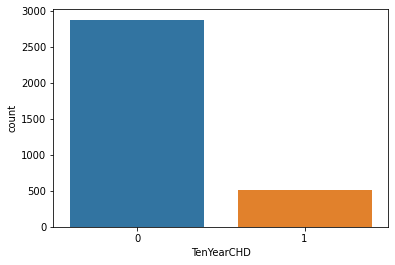

In [19]:
sns.countplot(x=dataset['TenYearCHD'])

Here we see that observation in one class is higher than the observation in 


other classes then there exists a class imbalance.Such data set is known as an imbalanced dataset in which the class having more data points is the majority class and the other is the minority class.

The imbalance makes the classification more challenging. Whenever we build a classifier with such data, it works well with the majority class but gives a poor performance with the minority class. Although, the model performance concerning the minority class matters the most. Some Machine Learning algorithms are more sensitive toward imbalanced data, such as Logistic Regression and Support Vector Machine. However, some algorithms tackle this issue themselves, such as Random Forest and XGBoost.

Sampling technique comes to save us and deal with imbalanced data.

There are two sampling techniques available to handle the imbalanced data:

Under Sampling Over Sampling

Here we choose Oversampling technique as Unlike under-sampling, this method leads to no information loss.

We apply this technique latter part

# **Exploratory Data Analysis**

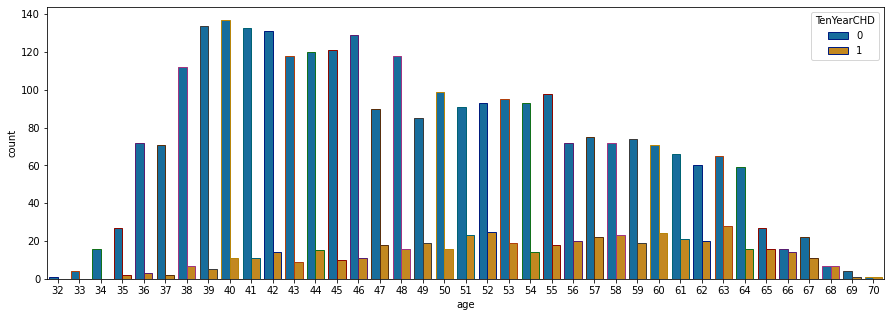

In [20]:
fig, axes = plt.subplots(figsize=(15,5))
sns.countplot(x='age',hue='TenYearCHD',data=dataset,palette='colorblind',edgecolor=sns.color_palette('dark'))

From the count plot we can see at the age of 63, there are high risk for 10-year risk of coronary heart disease CHD and at the age from 32 to 34 very less risk for 10-year risk of coronary heart disease CHD.

Percentage of Senior people lose their life : 29.22077922077922


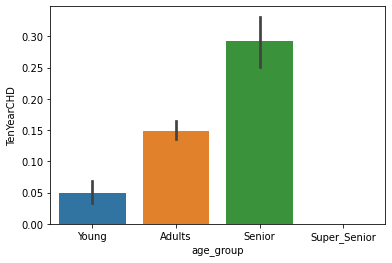

In [21]:
bins = [20,40,60, 80, np.nan]
labels = ['Young','Adults', 'Senior', 'Super_Senior']

dataset['age_group'] = pd.cut(dataset['age'], bins=bins, labels=labels)

print('Percentage of Senior people lose their life :', dataset['TenYearCHD'][dataset['age_group']=='Senior'].value_counts(normalize=True)[1]*100)

sns.barplot(x='age_group', y='TenYearCHD', data=dataset)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


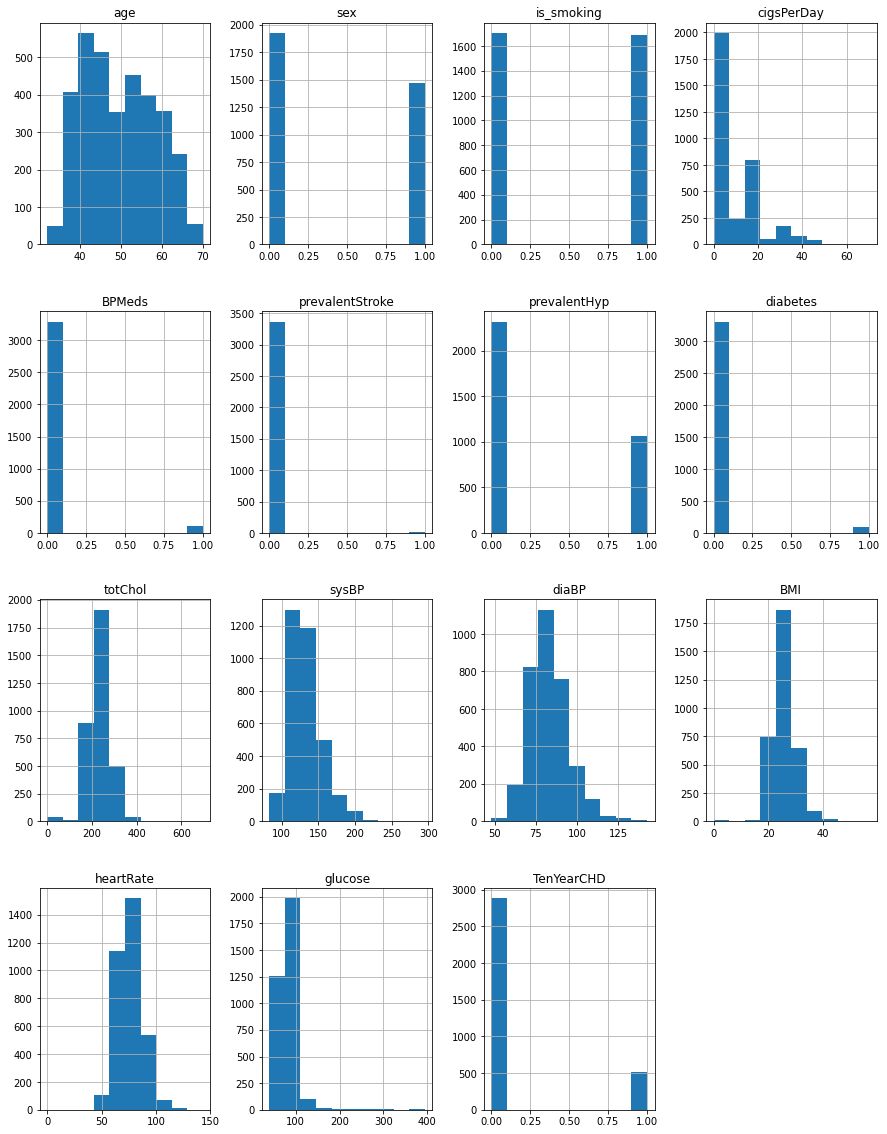

In [22]:
# understanding distribution of data before imputation
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dataset.hist(ax = ax)
plt.show()

A histogram is a graph showing frequency distributions. It is a graph showing the number of observations within each given interval.With Histograms we can see the shape of each feature and provides the count of number of observations in each bin.

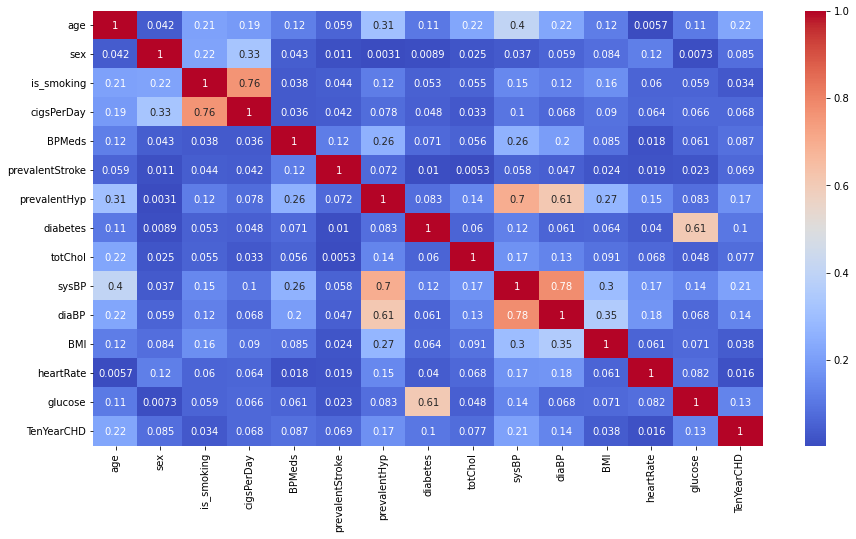

In [23]:
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

We can see there is a positive correlation between age,glucose,diaBP,SysBP,Diabetes,pravalentHyp with TenYearCHD . This makes sense since, all these features increases a greater chance of having heart disease

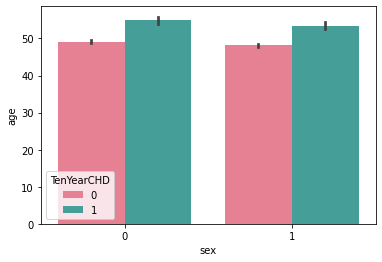

In [24]:
sns.barplot(data=dataset,x='sex',y='age',hue='TenYearCHD',palette='husl')

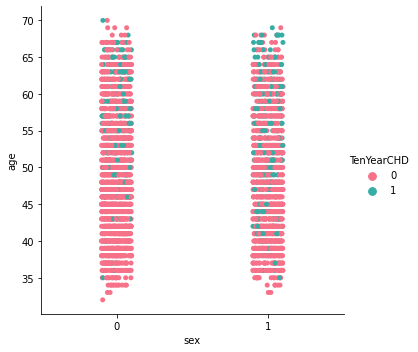

In [25]:
sns.catplot(data=dataset,x='sex',y='age',hue='TenYearCHD',palette='husl')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


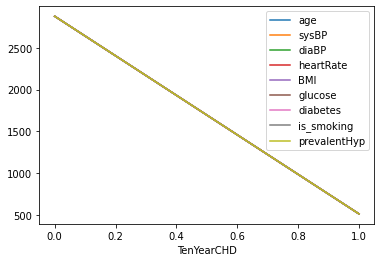

In [39]:
dataset.groupby(['TenYearCHD'])['age','sysBP','diaBP','heartRate','BMI','glucose','diabetes','is_smoking','prevalentHyp'].count().sort_values(by='TenYearCHD',ascending=False).head(10).plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


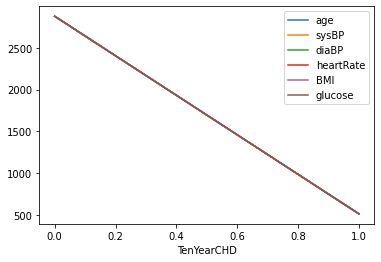

In [40]:
dataset.groupby(['TenYearCHD'])['age','sysBP','diaBP','heartRate','BMI','glucose'].count().sort_values(by='TenYearCHD',ascending=False).head(10).plot()

In [41]:
dataset = dataset.drop(['age_group'],axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


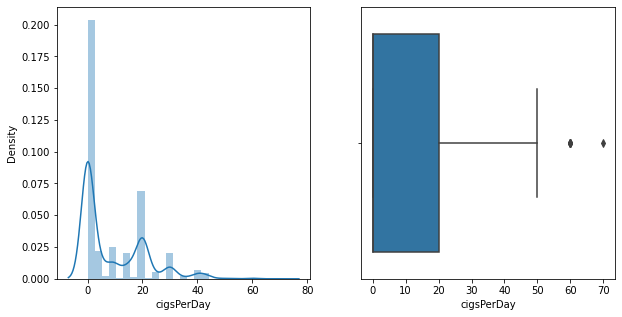

In [42]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(dataset['cigsPerDay'], ax=axes[0])
sns.boxplot(dataset['cigsPerDay'], ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


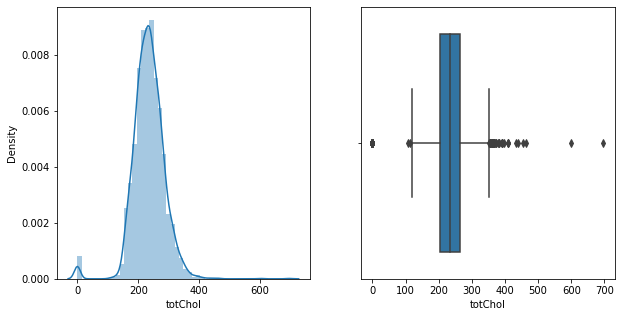

In [43]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(dataset['totChol'], ax=axes[0])
sns.boxplot(dataset['totChol'], ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


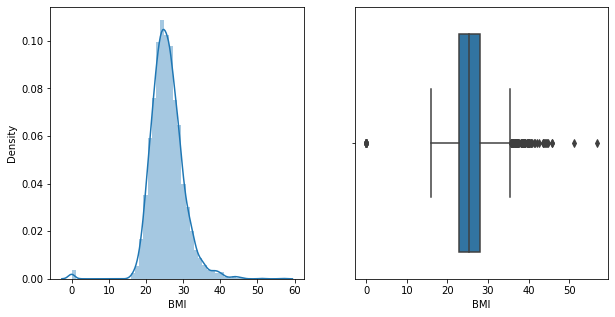

In [44]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(dataset['BMI'], ax=axes[0])
sns.boxplot(dataset['BMI'], ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


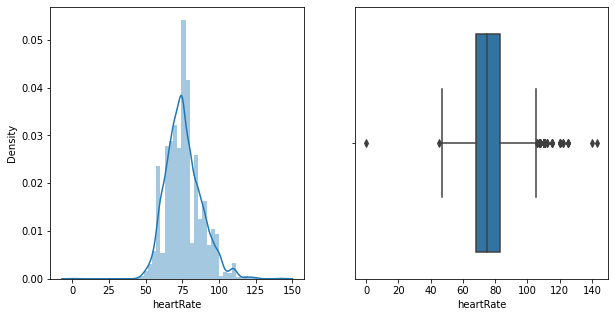

In [45]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(dataset['heartRate'], ax=axes[0])
sns.boxplot(dataset['heartRate'], ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


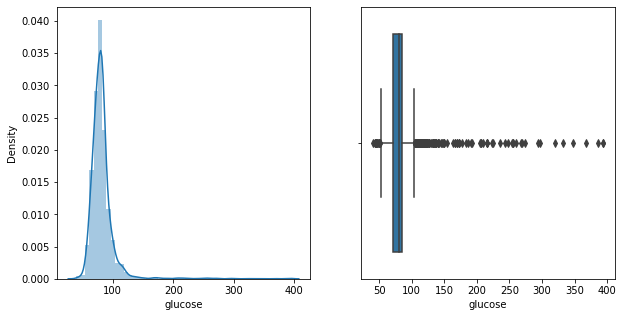

In [46]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(dataset['glucose'], ax=axes[0])
sns.boxplot(dataset['glucose'], ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


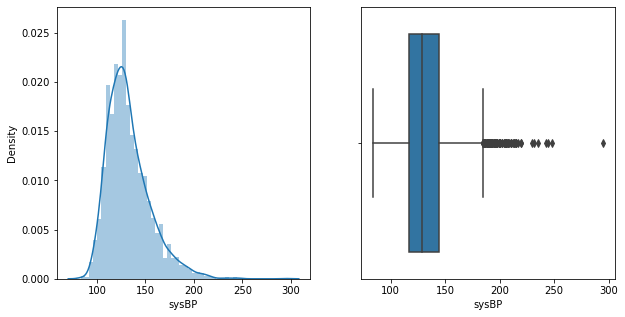

In [47]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(dataset['sysBP'], ax=axes[0])
sns.boxplot(dataset['sysBP'], ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


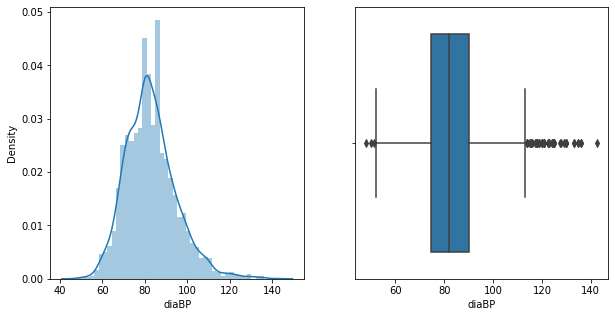

In [48]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(dataset['diaBP'], ax=axes[0])
sns.boxplot(dataset['diaBP'], ax=axes[1])

From the box plots, outliers are present in cigsPerDay,totchol,BMI,Heart rate,glucose,sysBP,diaBP.

The Outliers are removed using two methods,

Inter-Quartile Range
In IQR, the data points higher than the upper limit and lower than the lower limit are considered outliers.

upper limit = Q3 + 1.5 * IQR

lower limit = Q1 – 1.5 * IQR 2. Z-Score

In [49]:
from scipy.stats import zscore
from scipy import stats

In [50]:
#Removing outliers using Z-score
z = np.abs(stats.zscore(dataset))
dataset2 = dataset[(z<3).all(axis=1)]
dataset2.shape

(3046, 15)

In [51]:
#find Q1, Q3, and interquartile range for each column
Q1 = dataset.quantile(q=.25)
Q3 = dataset.quantile(q=.75)
IQR = dataset.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = dataset[~((dataset < (Q1-1.5*IQR)) | (dataset > (Q3+1.5*IQR))).any(axis=1)]

In [52]:
data_clean.shape

(2439, 15)

data_clean.shape
data_clean.shape
After using Z socre to detect and remove outliers, the number of records in dataset is 2439, 15. As number of reocrds available is higher after z Score, we will proceed with z score